# TorchLife

> Survival Analysis using pytorch

This library takes a deep learning approach to Survival Analysis.

## What is Survival Analysis
A lot of classification problems are actually survival analysis problems and haven't been tackled as such. For example, consider a cancer patient and you take X-ray data from that patient. Over time, patients will **eventually** die from cancer (lets ignore the case where people will die from other diseases). The usual approach is to say here is the X-ray (x) and will the patient die in the next 30 days or not (y).

Survival analysis instead asks the question given the input (x) and a time(t), what is the probability that a patient will survive for a time greater than t. Considering the training dataset if a patient is still alive, in the classification case it would be thought of as y = 0. In survival analysis we say that it is a censored observation since the patient will die at a certain time in the future when the experiment is not being conducted.

The above analogy can be thought of in other scenarios such as churn prediction as well.

A proper dive into theory can be seen [here](./SAT).

## What's with the name?
Well, if you torch a life... you probability wouldn't survive. 😬

## Install

`pip install torchlife`

## How to use
We need a dataframe that has a column named 't' indicating time, and 'e' indicating a death event.

In [ ]:
# hide
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/CamDavidsonPilon/lifelines/master/lifelines/datasets/rossi.csv"
df = pd.read_csv(url)
df.rename(columns={'week':'t', 'arrest':'e'}, inplace=True)

In [ ]:
df.head()

,t,e,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [ ]:
from torchlife.model import ModelHazard

model = ModelHazard('cox', lr=0.5)
model.fit(df)
λ, S = model.predict(df)

epoch,train_loss,valid_loss,time
0,6.993955,10.741218,00:00
1,8.774823,14.736155,00:00
2,9.991431,16.564432,00:00
3,10.995527,17.174604,00:00
4,11.723181,16.920387,00:00
5,12.060142,15.983603,00:00
6,12.174074,14.553919,00:00
7,12.038597,12.683950,00:00
8,11.702325,10.452137,00:00
9,11.218502,7.981377,00:00


Let's plot the survival function for the 4th element in the dataframe:

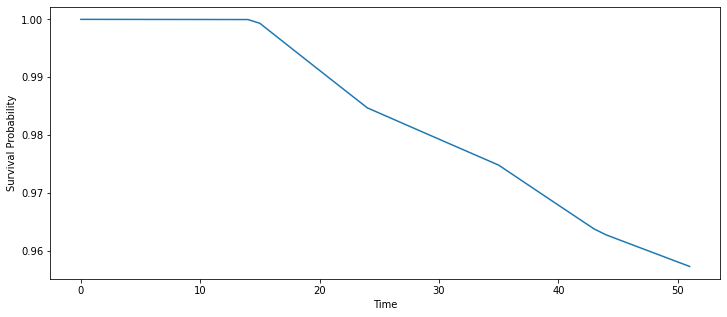

In [ ]:
x = df.drop(['t', 'e'], axis=1).iloc[2]
t = np.arange(df['t'].max())
model.plot_survival_function(t, x)